In [1]:
import os

os.chdir("/work4/clf/david/Bayesian/BayesianGit/BayesianOptimiser2")

import numpy as np
import scipy.constants as con
import matplotlib.pyplot as plt
import BOPackage

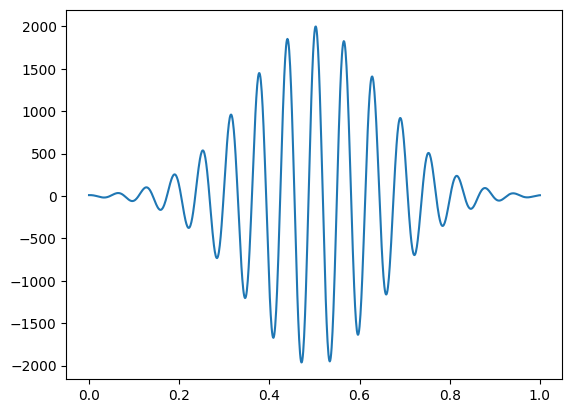

In [2]:
"""
Define the objective function.
"""

def ObjectiveFunction(x):
    x_centre = 0.5
    FWHM = 0.3
    width = FWHM / (2 * np.log(2))

    spatial_intensity =  np.exp(- ((x - x_centre) / width)**2)

    return 2000 * np.cos(100 * x) * spatial_intensity

X = np.linspace(0, 1, 1001, endpoint=True)

plt.plot(X, ObjectiveFunction(X))

In [3]:
"""
Configure the optimiser.
"""
Kernel = BOPackage.RBF_Kernel
length_scale = 0.0808313 / 2

AcquisitionFunction = BOPackage.UpperConfidenceBound
max_kappa = 10
min_kappa = 0.1

bounds = np.array([[0, 1]])
n_samples = 10

log_path = '/work4/clf/david/Bayesian/Outputs/BO_Test_log_1'

# Create the object
bo = BOPackage.BO(KernelFunction=BOPackage.RBF_Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  n_samples=n_samples,
                  dynamic_bounds=True,
                  iterations_between_reducing_bounds=3,
                  first_reduce_bounds=10,
                  reduce_bounds_factor=0.75,
                  #log_path=log_path,
                  random_seed=23)

In [4]:
"""
Get first random batch and update the optimiser.
"""

raw_X = bo.GetRandomXBatch(batch_size=4)
raw_y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_y)

Current best y value was [1825.69380719]; the corresponding X values were [0.56518821]
The bounds have been reduced 0 times


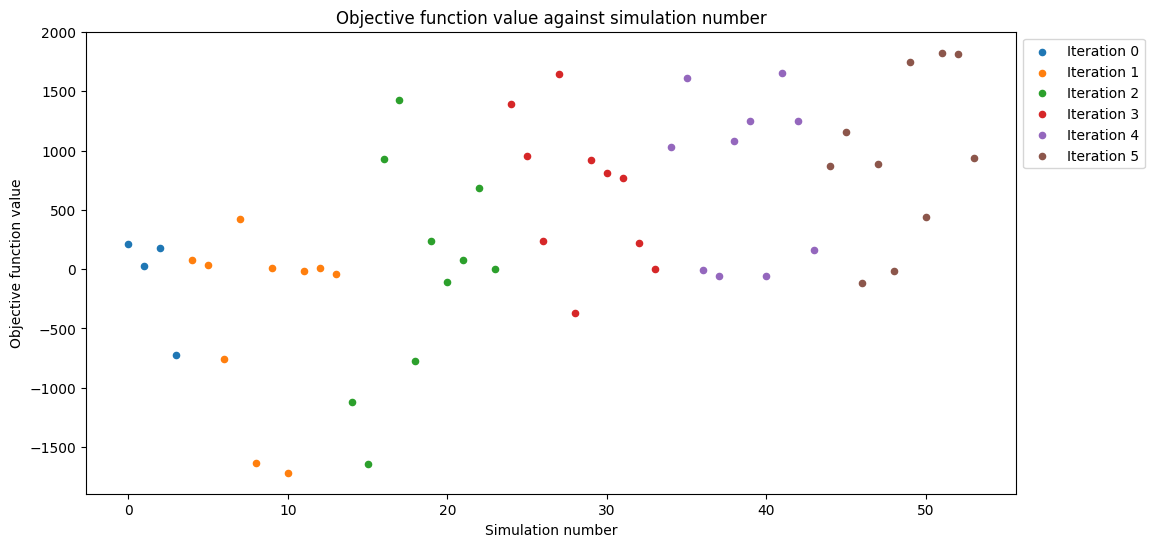

In [5]:
for i in range(5):

    raw_X = bo.GetNextXBatch(10, sub_batch_size=5, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo.UpdateData(raw_X, raw_y)

bo.PrintCurrentStatus()
BOPackage.PlotData(bo)

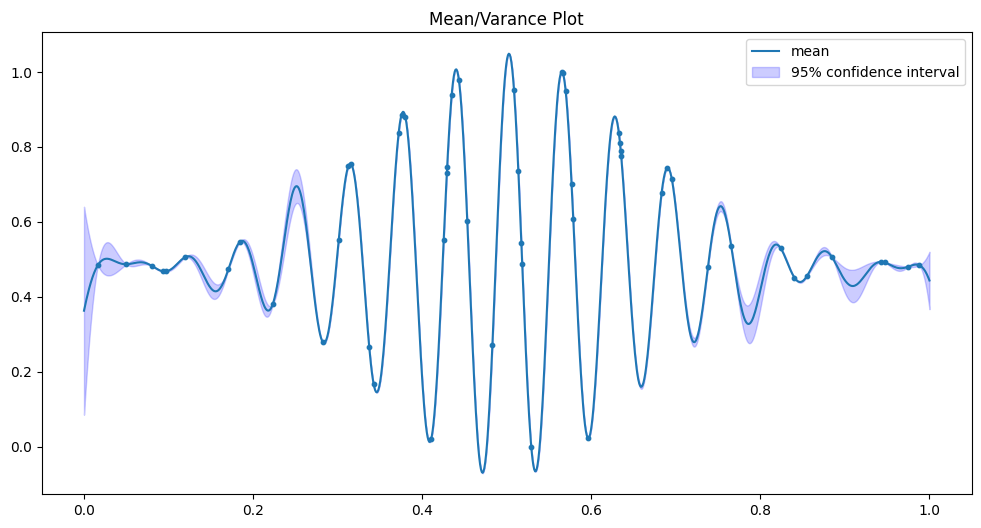

In [6]:
"""
Take a look at the mean and variance of the function now we have some data
"""

BOPackage.SausagePlot(bo)

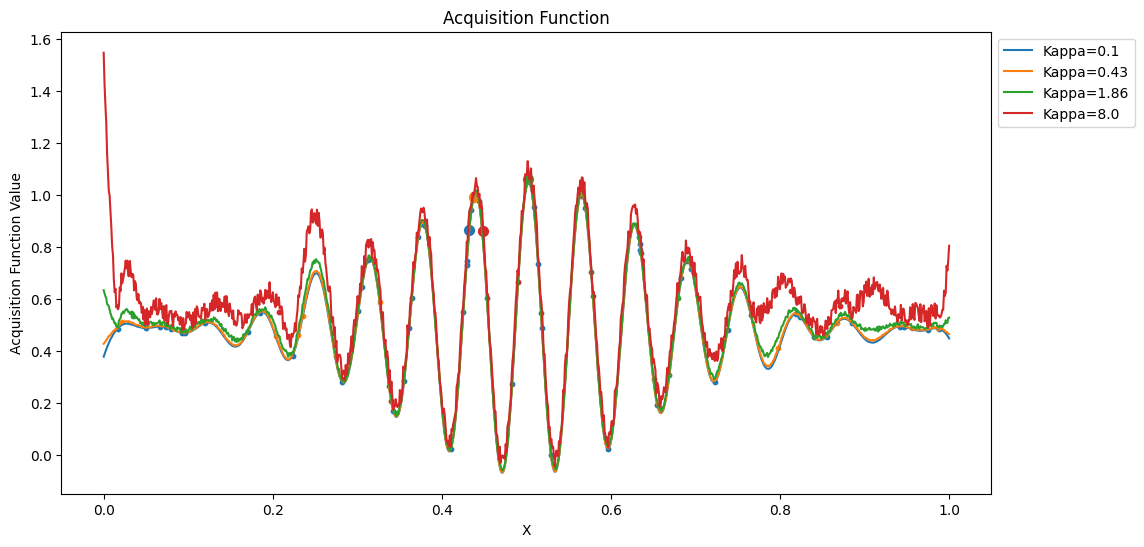

In [7]:
"""
Plot the Acquisition function for a range of kappas and demonstrate how the next point is selected.

'n_sample' random X values are selected and the one which returns the largest acqusition function value
is chosen for each kappa value. Assuming no 'sub batches' are used, there will be 'batch_size' kappa 
values and a point in X will be selected for each kappa value.
"""

BOPackage.KappaAcquisitionFunctionPlot(bo, number_kappas=4, number_candidate_points=10, max_kappa=8, min_kappa=0.1)

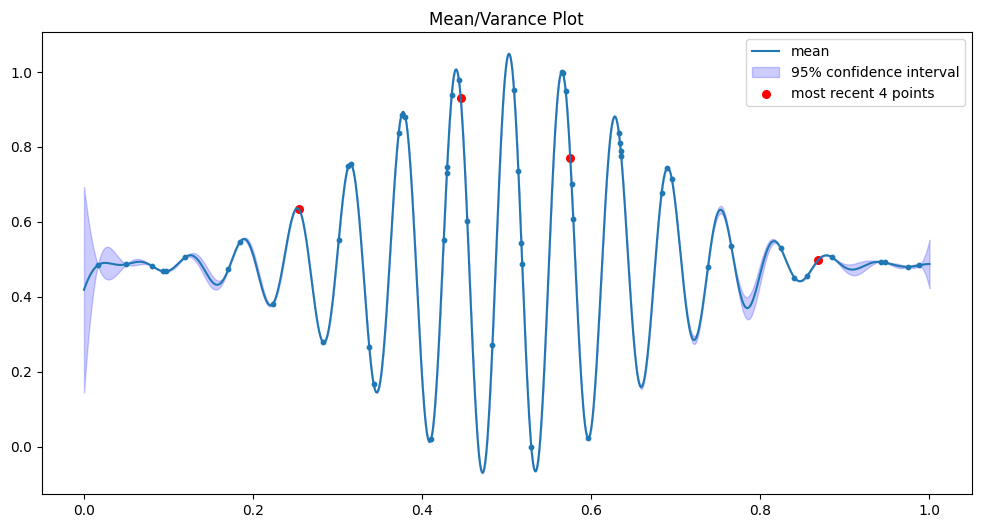

In [8]:
"""
Now select the next batch of X values using the acquisition function (not random) and update the optimiser.
"""

batch_size = 4
raw_X = bo.GetNextXBatch(batch_size=batch_size, max_kappa=max_kappa, min_kappa=min_kappa)
raw_y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_y)
bo.WriteOutputToCSV('/work4/clf/david/Bayesian/Outputs/BO_Test_Outputs_1/Results.csv', raw_X, raw_y)

BOPackage.SausagePlot(bo, highlight_recent=batch_size)

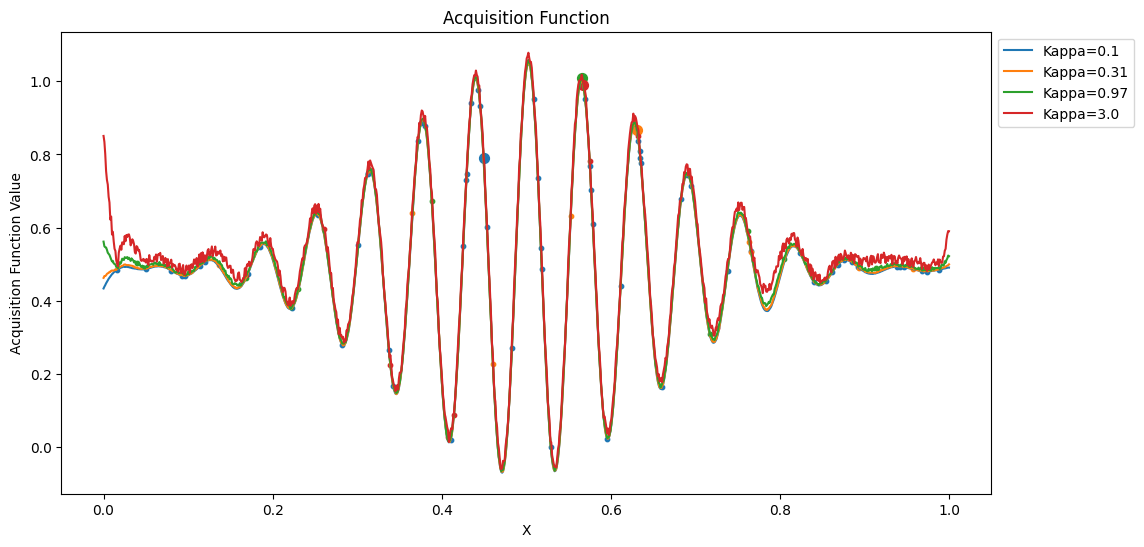

In [9]:
"""
Again lets looks at the acquisition function and how our next X set is selected.
"""
BOPackage.KappaAcquisitionFunctionPlot(bo, number_kappas=4, number_candidate_points=10, max_kappa=3, min_kappa=0.1)

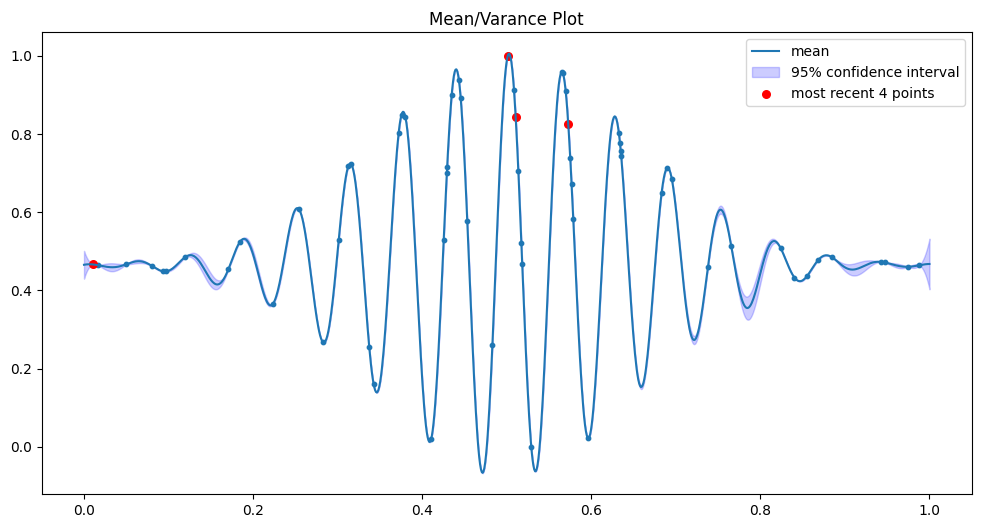

In [10]:
"""
Final example of doing this again.
"""
batch_size = 4

raw_X = bo.GetNextXBatch(batch_size=4, max_kappa=max_kappa, min_kappa=min_kappa)
raw_y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_y)
bo.WriteOutputToCSV('/work4/clf/david/Bayesian/Outputs/BO_Test_Outputs_1/Results.csv', raw_X, raw_y)

BOPackage.SausagePlot(bo, highlight_recent=batch_size)

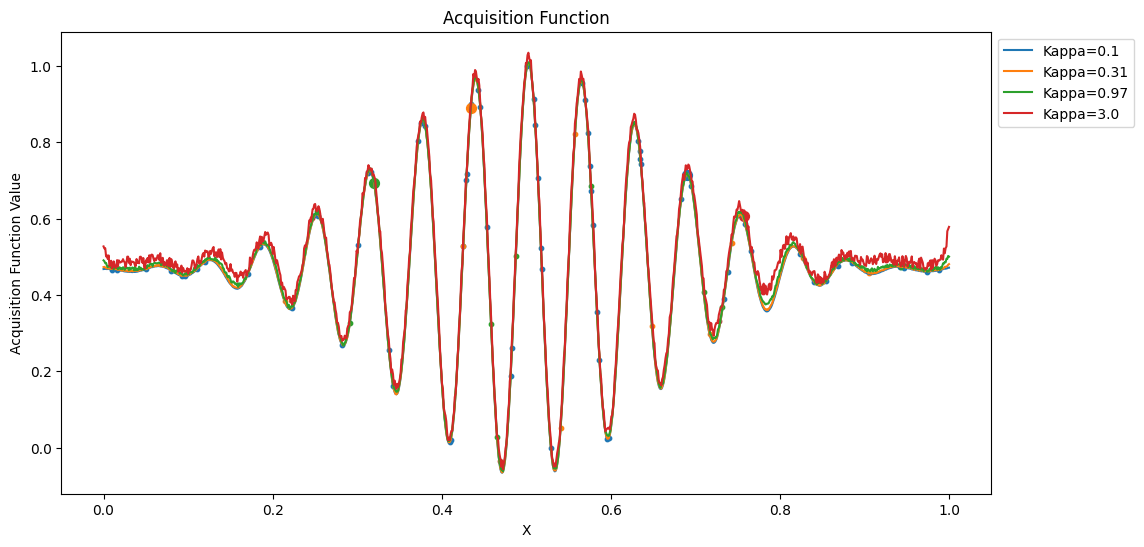

In [11]:
BOPackage.KappaAcquisitionFunctionPlot(bo, number_kappas=4, number_candidate_points=10, max_kappa=3, min_kappa=0.1)

In [12]:
for i in range(10):
    batch_size = 4
    raw_X = bo.GetNextXBatch(batch_size=batch_size, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo.UpdateData(raw_X, raw_y)



In [13]:
print(bo.bounds)
print(f'Current best y value was {bo.BestData()[1][0]}; the corresponding X values were {bo.X_data[bo.BestData()[0][0]]}')


[[0.2919172 0.7137922]]
Current best y value was [1999.25256746]; the corresponding X values were [0.5028547]


In [14]:
"""
Can save the object for use later
"""

# BOPackage.SaveOptimisaer(bo, '/Users/jordanlee/Projects/SummerProject/Bayesian/BayesianOptimiser2/BO.pkl')

'\nCan save the object for use later\n'

In [15]:
"""
Can reload the object and continue as before.
"""

# bo2 = BOPackage.LoadOptimiser('/Users/jordanlee/Projects/SummerProject/Bayesian/BayesianOptimiser2/BO.pkl')
# BOPackage.SausagePlot(bo2)

'\nCan reload the object and continue as before.\n'

In [16]:
raw_X, raw_y = bo.UpdateDataCSV('/work4/clf/david/Bayesian/Outputs/BO_Test_Outputs_2/Results.csv', update_iteration=True)
bo.WriteOutputToCSV('/work4/clf/david/Bayesian/Outputs/BO_Test_Outputs_1/Results.csv', raw_X, raw_y)

for i in range(20):
    raw_X = bo.GetNextXBatch(batch_size=batch_size, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo.UpdateData(raw_X, raw_y)
    bo.WriteOutputToCSV('/work4/clf/david/Bayesian/Outputs/BO_Test_Outputs_1/Results.csv', raw_X, raw_y)


In [17]:
print(f'Current best y value was {bo.BestData()[1][0]}; the corresponding X values were {bo.X_data[bo.BestData()[0][0]]}')


Current best y value was [1999.69621354]; the corresponding X values were [0.50266371]


In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Example data
X1 = np.linspace(-5, 10, 100)
X2 = np.linspace(0, 15, 100)
X1_grid, X2_grid = np.meshgrid(X1, X2)
X = np.c_[X1_grid.ravel(), X2_grid.ravel()]
y = ObjectiveFunction(X)

# Fit a Gaussian Process with an RBF kernel
kernel = RBF(length_scale=1.0)  # You can start with an initial guess
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)

# Get the optimized length scale
length_scale = gp.kernel_.length_scale
print("Estimated Length Scale:", length_scale)


Estimated Length Scale: 0.08083136610295194
